<a href="https://colab.research.google.com/github/Yoris95/Mushroom_Classification/blob/main/Mushroom_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Phase 1 : **Data Collection**

Question to ask?
1. What kind of problem are we trying to solve? This data set is a secunder data, it includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended.  This latter class was combined with the poisonous one. The characteristics of mushrooms and edible ones are still very difficult to distinguish, so that they can trigger poisoning. Therefore, I am trying to use machine learning models to detect whether a mushroom is edible or poisonous.  

2. What data sources already exist? Kaggle or UCI ML Repository
3. What privacy concern are there? -
4. Is the data public? Yes, it is
5. Where should we store the data? Anywhere 

In [1]:
pip install ipympl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 508 kB 13.7 MB/s 
     |████████████████████████████████| 11.2 MB 76.8 MB/s 
     |████████████████████████████████| 944 kB 58.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
import pandas as pd

In [2]:
# Get the data
df = pd.read_csv('agaricus-lepiota.csv', header = None)

Phase 2: **Data Preparation**
1. Exploratory Data Analysis (EDA)
2. Data Preprocessing
3. Data Splitting

**Exploratory Data Analysis (EDA)**

Question to ask?
1. What are the feature variables and target variables? 
2. What kind of data do you have?
3. Are there missing values? Should you remove them or fill them with feature imputation?
4. Where are the outliers? How many of them are there?
5. Are there questions you could ask a domain expert about the data? 



In [3]:
# Rename all the columns
df.rename(columns={0 : 'class', 1 :'cap-shape', 2 :'cap-surface', 3 :'cap-color', 4 :'bruises', 5 :'odor',
                            6 :'gill-attachment', 7 :'gill-spacing', 8 :'gill-size', 9 :'gill-color',
                     10 :'stalk-shape', 11 :'stalk-root', 12 :'stalk-surface-above-ring', 13 :'stalk-surface-below-ring',
                     14 :'stalk-color-above-ring', 15 :'stalk-color-below-ring', 16 :'veil-type', 17:'veil-color', 
                     18:'ring-number', 19:'ring-type', 20:'spore-print-color', 21:'population', 22:'habitat'}, inplace=True)

In [4]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [7]:
df.shape

(8124, 23)

In [8]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [11]:
for column in df.columns:
  print(column, ": ", df[column].unique())

class :  ['p' 'e']
cap-shape :  ['x' 'b' 's' 'f' 'k' 'c']
cap-surface :  ['s' 'y' 'f' 'g']
cap-color :  ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises :  ['t' 'f']
odor :  ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment :  ['f' 'a']
gill-spacing :  ['c' 'w']
gill-size :  ['n' 'b']
gill-color :  ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape :  ['e' 't']
stalk-root :  ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring :  ['s' 'f' 'k' 'y']
stalk-surface-below-ring :  ['s' 'f' 'y' 'k']
stalk-color-above-ring :  ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring :  ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type :  ['p']
veil-color :  ['w' 'n' 'o' 'y']
ring-number :  ['o' 't' 'n']
ring-type :  ['p' 'e' 'l' 'f' 'n']
spore-print-color :  ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population :  ['s' 'n' 'a' 'v' 'y' 'c']
habitat :  ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [12]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

**Data Preprocessing**

1. Feature Imputation (filling missing value)
2. Feature Encoding (turning values into numbers)
3. Feature Normalization or Scalling
4. Feature Engineering
5. Feature Selection (select the most valuable features of your datasets)
6. Dealing with imbalances

**Feature Imputation**

In [13]:
df.iloc[:,0:12]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root
0,p,x,s,n,t,p,f,c,n,k,e,e
1,e,x,s,y,t,a,f,c,b,k,e,c
2,e,b,s,w,t,l,f,c,b,n,e,c
3,p,x,y,w,t,p,f,c,n,n,e,e
4,e,x,s,g,f,n,f,w,b,k,t,e
...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?
8120,e,x,s,n,f,n,a,c,b,y,e,?
8121,e,f,s,n,f,n,a,c,b,n,e,?
8122,p,k,y,n,f,y,f,c,n,b,t,?


In [14]:
# There are some missing values in "stalk-root" feature
df['stalk-root'][df['stalk-root']=='?']

3984    ?
4023    ?
4076    ?
4100    ?
4104    ?
       ..
8119    ?
8120    ?
8121    ?
8122    ?
8123    ?
Name: stalk-root, Length: 2480, dtype: object

In [19]:
(len(df[df['stalk-root']=='?'])/len(df))*100

30.526834071885773

In [ ]:
# About 30.52% information of stalk-root is missing.

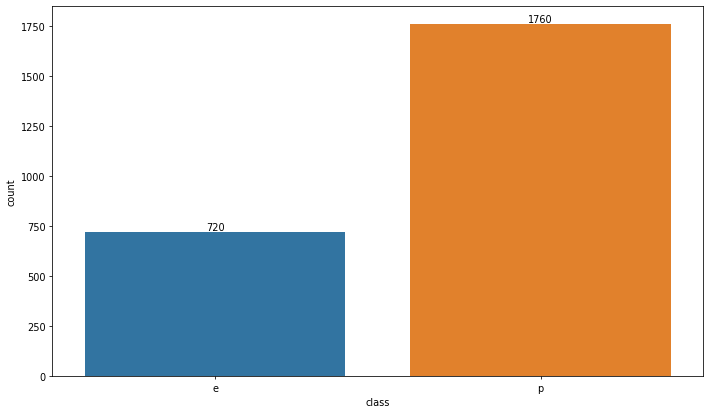

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,7),dpi=70)
ax=sns.countplot(data=df[df['stalk-root']=='?'], x='class')
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
#out of 2480 of missing values, 1760 belongs to poisonous class and 720 belongs to edible class

In [26]:
df['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

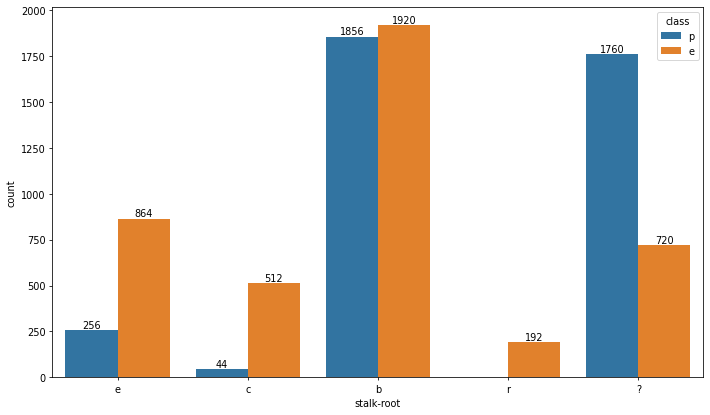

In [27]:
plt.figure(figsize=(12,7),dpi=70)
ax=sns.countplot(data=df,x='stalk-root',hue='class')
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
# Conclusion:
# 1. 2480 rows (i.e 30% data) in stalk-root feature are missing
# 2. out of them 1760 (71% of data) belongs to poisonous class & 720 (29% of data) belongs to edible
# 3. Highest occurance of stalk-root values is 'b'
# 4. out of 8124, 3776 (46%) values are of 'b', 
# 5. out of 3776 of 'b's, there are 1856 'poisonous' and 1920 'edible'

In [33]:
# Check the percentage of class 'p'
(len(df[df['class']=='p'])/len(df))*100

48.20285573609059

In [34]:
# Check the percentage of class 'e'
(len(df[df['class']=='e'])/len(df))*100

51.7971442639094

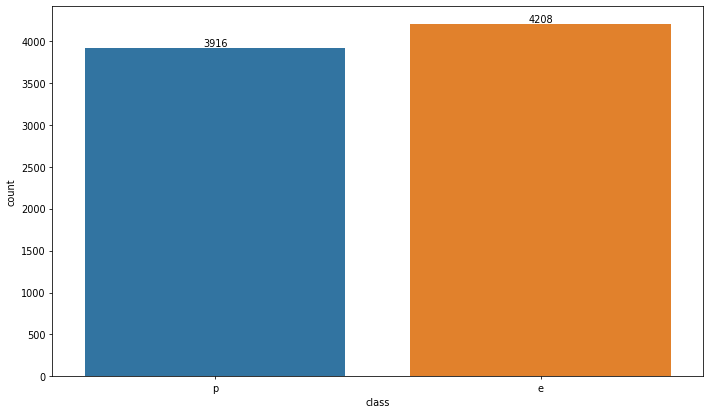

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,7),dpi=70)
ax=sns.countplot(data=df, x='class')
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
# From the plot above, it's seen that the dataset is balanced.

In [36]:
# filling missing values with 'b'
df['stalk-root']=df['stalk-root'].replace('?',df['stalk-root'].mode()[0])

In [37]:
df['stalk-root']

0       e
1       c
2       c
3       e
4       e
       ..
8119    b
8120    b
8121    b
8122    b
8123    b
Name: stalk-root, Length: 8124, dtype: object

In [38]:
df['stalk-root'].unique()

array(['e', 'c', 'b', 'r'], dtype=object)

**Feature Encoding**

In [39]:
# Turn labels into distinct numerical values by using label encoder

from sklearn.preprocessing import LabelEncoder
def label_encoding(c):
    le = LabelEncoder()
    df[c] = le.fit_transform(df[c])
    df[c].unique()
for col in df.columns:
    label_encoding(col)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


**Feature Selection**

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [41]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [42]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [43]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [44]:
featureScores

,Specs,Score
0,cap-shape,17.508364
1,cap-surface,214.068544
2,cap-color,11.511382
3,bruises,1194.277352
4,odor,75.910163
5,gill-attachment,3.505447
6,gill-spacing,826.795274
7,gill-size,1636.606833
8,gill-color,5957.764469
9,stalk-shape,36.594105


In [45]:
#print 10 best feature
print(featureScores.nlargest(10,'Score'))  

                       Specs        Score
8                 gill-color  5957.764469
18                 ring-type  1950.610146
7                  gill-size  1636.606833
10                stalk-root  1358.358638
3                    bruises  1194.277352
6               gill-spacing   826.795274
21                   habitat   751.309489
19         spore-print-color   379.132729
20                population   311.766736
11  stalk-surface-above-ring   222.982400


In [46]:
# to remove the rest of the features:
X = bestfeatures.transform(X)

In [47]:
X

array([[1, 0, 1, ..., 2, 3, 5],
       [1, 0, 0, ..., 3, 2, 1],
       [1, 0, 0, ..., 3, 2, 3],
       ...,
       [0, 0, 0, ..., 0, 1, 2],
       [0, 0, 1, ..., 7, 4, 2],
       [0, 0, 0, ..., 4, 1, 2]])

In [48]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

**Data Splitting**

In [140]:
# Splitting dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Feature Scaling**

In [141]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Phase 3: **Train Model on Data**
1. Choosing an algorithm
2. Is it overfitting or underfitting?

**Choosing an Algorithm**
1. Supervised Learning
* Logistic Regression  
* Support Vector Machine (SVM)
* K-Nearest Neighbours (KNN)  
* Decision Tree
* Random Forest
* Naive Bayes
* Adaboost
* Gradient Boosting
* Extreme Gradient Boosting (XGBoost)
* CatBoost


*Logistic Regression*

In [183]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(y_pred)

[1 0 0 ... 1 0 0]


In [184]:
from sklearn.metrics import confusion_matrix, accuracy_score
accLR = accuracy_score(y_test, y_pred)
cmLR = confusion_matrix(y_test, y_pred)
print(f"Accuracy score: {accLR}")
print(cmLR)

Accuracy score: 0.939076923076923
[[816  36]
 [ 63 710]]


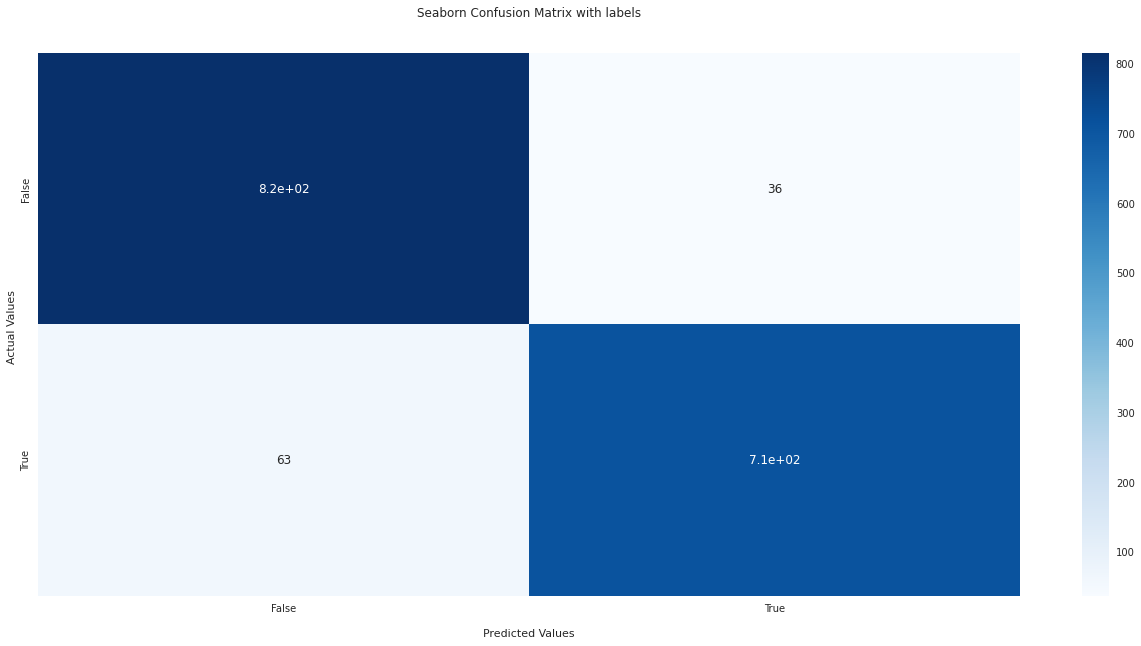

In [185]:
import seaborn as sns

ax = sns.heatmap(cmLR, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [186]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [187]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_scoreLR = roc_auc_score(y_test, y_pred)

print(auc_scoreLR)

0.9381229160213547


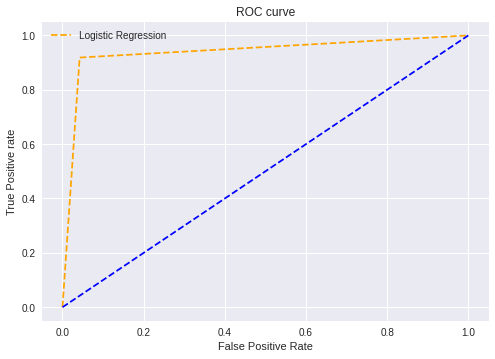

In [188]:
# matplotlib
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
# plt.savefig('ROC',dpi=300)
plt.show();

Feature: 0, Score: 0.49086
Feature: 1, Score: -2.75562
Feature: 2, Score: 4.27464
Feature: 3, Score: -0.76944
Feature: 4, Score: -2.94866
Feature: 5, Score: -4.42476
Feature: 6, Score: 1.82224
Feature: 7, Score: -0.52196
Feature: 8, Score: -0.95938
Feature: 9, Score: 0.48652


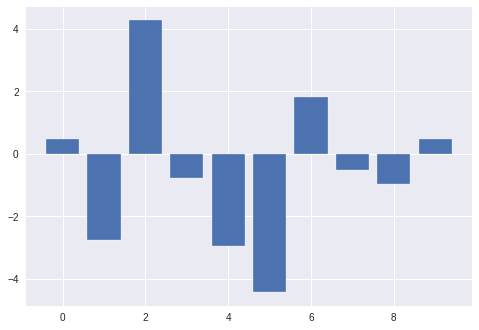

In [189]:
from sklearn.datasets import make_classification
from matplotlib import pyplot
# get importance
importance = classifier.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

/usr/local/lib/python3.7/dist-packages/yellowbrick/model_selection/importances.py:199: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  YellowbrickWarning,


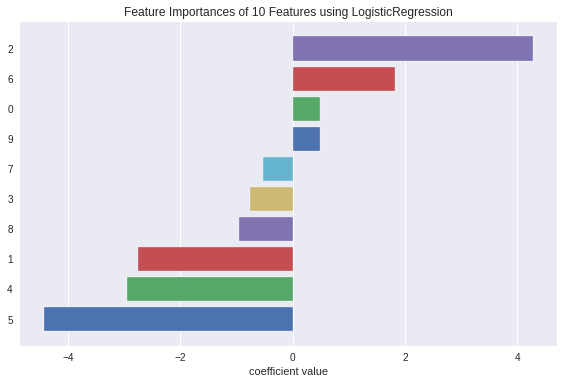

<AxesSubplot:title={'center':'Feature Importances of 10 Features using LogisticRegression'}, xlabel='coefficient value'>

In [190]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(classifier, stack=False, relative=False)
viz.fit(X_train, y_train)
viz.show()

*Support Vector Machine (SVM)*

In [197]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [198]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = classifier.predict(X_test)

cmSVM = confusion_matrix(y_test, y_pred)
print(cmSVM)

[[835  17]
 [ 66 707]]


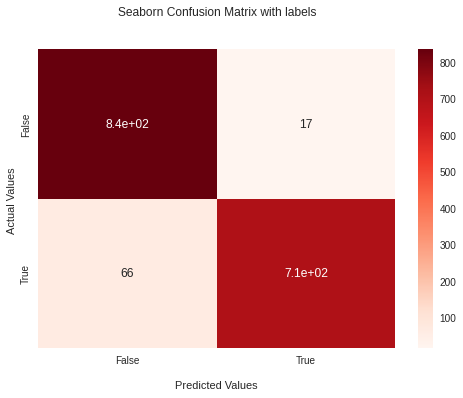

In [199]:
import seaborn as sns

ax = sns.heatmap(cmSVM, annot=True, cmap='Reds')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [200]:
accSVM = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {accSVM}")

Accuracy score: 0.9489230769230769


In [201]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

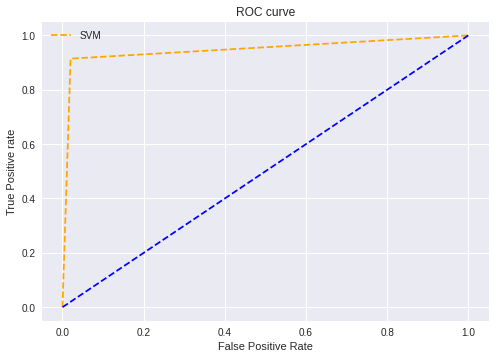

In [202]:
# matplotlib
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='SVM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
# plt.savefig('ROC',dpi=300)
plt.show();

*K-Nearest Neighbours (KNN)*

In [203]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [204]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = classifier.predict(X_test)

cmKNN = confusion_matrix(y_test, y_pred)
print(cmKNN)

[[852   0]
 [  0 773]]


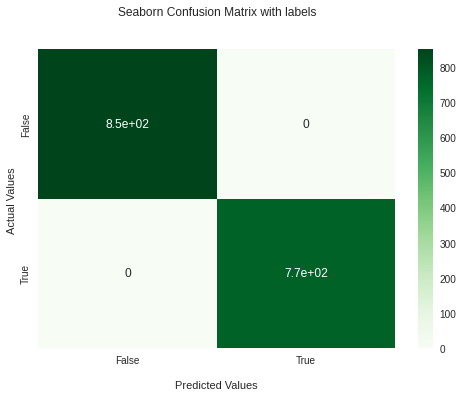

In [205]:
import seaborn as sns

ax = sns.heatmap(cmKNN, annot=True, cmap='Greens')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [206]:
accKNN = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {accKNN}")

Accuracy score: 1.0


In [207]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [208]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, y_pred)

print(auc_score1)

1.0


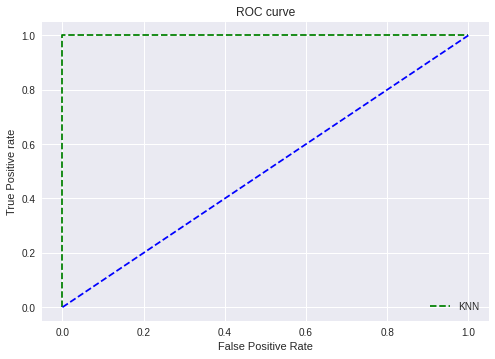

In [209]:
# matplotlib
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='Green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
# plt.savefig('ROC',dpi=300)
plt.show();

*Decision Tree*

In [210]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [211]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = classifier.predict(X_test)

cmDT = confusion_matrix(y_test, y_pred)
print(cmDT)

[[852   0]
 [  0 773]]


In [212]:
accDT = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {accDT}")

Accuracy score: 1.0


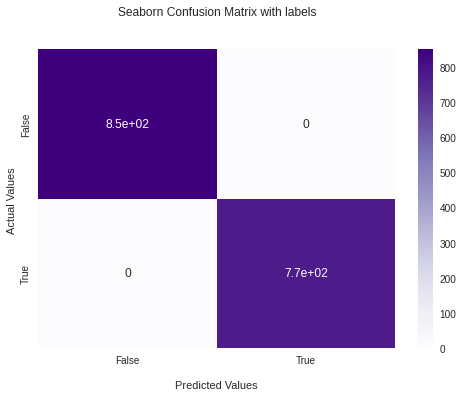

In [213]:
import seaborn as sns

ax = sns.heatmap(cmDT, annot=True, cmap='Purples')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [214]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [215]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_scoreDT = roc_auc_score(y_test, y_pred)

print(auc_scoreDT)

1.0


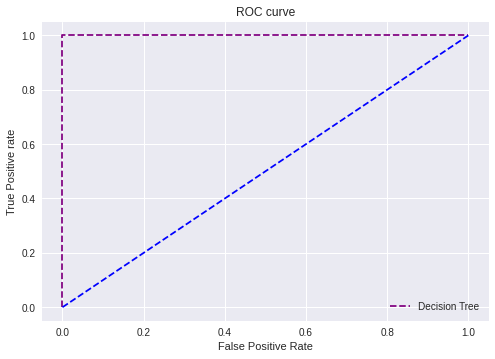

In [216]:
# matplotlib
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='Purple', label='Decision Tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
# plt.savefig('ROC',dpi=300)
plt.show();

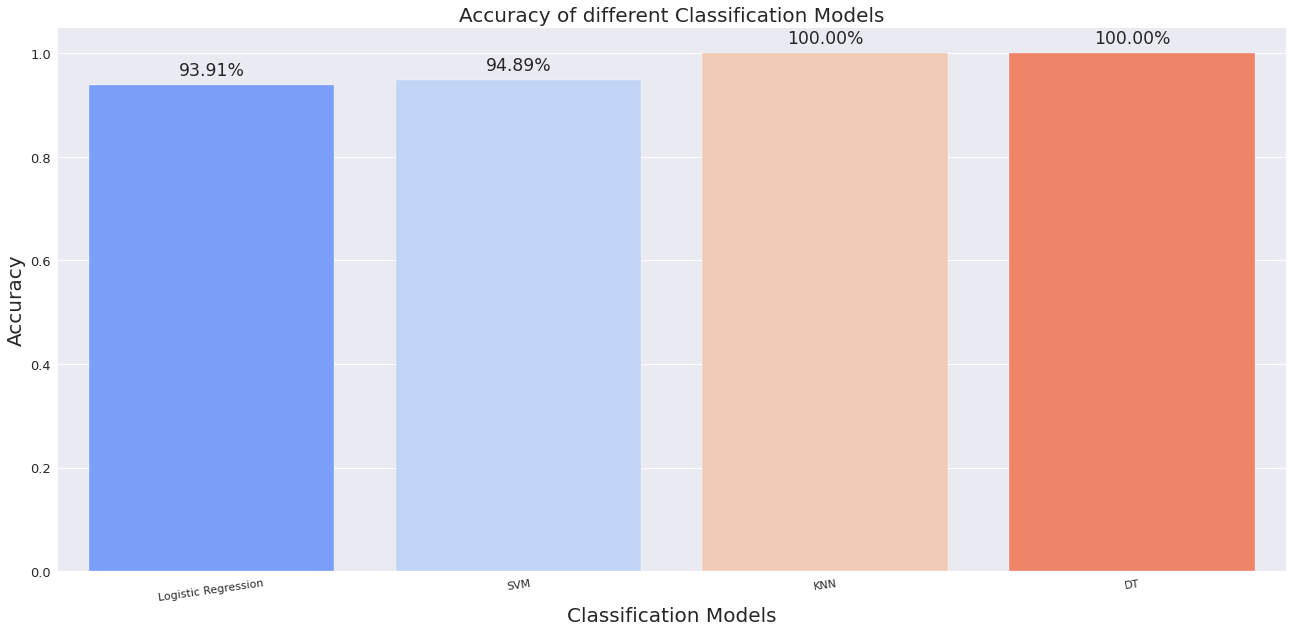

In [217]:
mylist=[]
mylist2=[]
mylist.append(accLR)
mylist2.append("Logistic Regression")
mylist.append(accSVM)
mylist2.append("SVM")
mylist.append(accKNN)
mylist2.append("KNN")
mylist.append(accDT)
mylist2.append("DT")

plt.rcParams['figure.figsize']=22,10
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "coolwarm", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()